In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def titulos(n):
  switch={
      1:"z^3-2z+2",
      2:"z^8+15z^4-16",
      3:"z^3-1"
  }
  return switch.get(n)

def f(z,n):
  switch={
      1:z**3-2*z+2,
      2:z**8+15*z**4-16,
      3:z**3 -1
  }
  return switch.get(n)

def df(z,n):
  switch={
      1:3*z**2-2,
      2:8*z**7+60*z**3,
      3:3*z**2
  }
  return switch.get(n)

def roots(n):
  switch={
      1:[-1.7693,complex(0.88465,-0.58974),complex(0.88465,0.58974)],
      2:[-1,1,complex(0,-1),complex(0,1),complex(math.sqrt(2),math.sqrt(2))
      ,complex(-math.sqrt(2),-math.sqrt(2)),complex(-math.sqrt(2),math.sqrt(2))
      ,complex(math.sqrt(2),-math.sqrt(2))],
      3:[1,complex(-0.5,math.sqrt(3)/2),complex(-0.5,-math.sqrt(3)/2)]
  }
  return switch.get(n)

def newton_set1(n,z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    roots_list=[None]*len(roots(n))
    for i in range(len(roots_list)):
      roots_list[i]=roots(n)[i]

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 15

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z=z,n=n)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - (f(z=z,n=n) / dz) # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext
                for i in range(len(roots_list)):
                  values=[0]*3
                  flag=False
                  if abs(z-roots_list[i])<eps:
                    #print("Entra con "+str(i))
                    values[i%3]=255-count*multcol
                    values[(i+1)%3]=255-(count*multcol/2)
                    values[(i+2)%3]=255-(count*multcol/4)
                    pixels[height-y-1,x] = (values[0], values[1], values[2])
                    flag=True
                    break
                if(flag==False):
                  #print("No entra")   
                  pixels[height-y-1,x] = (52, 235, 94)
    return pixels

def display1(n=0,z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(n=n,z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title("Newton Fractal f(z)="+titulos(n))
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

## Plot z^3-2z+2

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


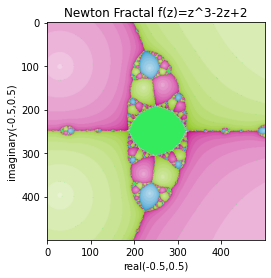

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


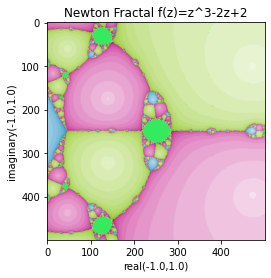

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


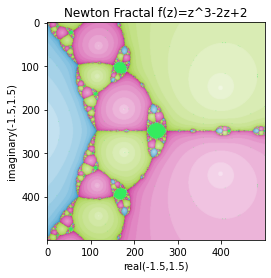

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


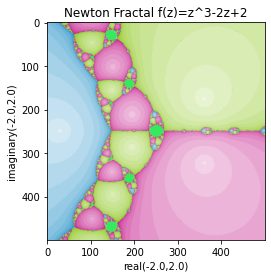

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


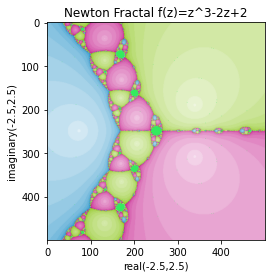

In [ ]:
display1(n=1,zoom=1,z_c_r=0, z_c_i=0)
display1(n=1,zoom=2,z_c_r=0, z_c_i=0)
display1(n=1,zoom=3,z_c_r=0, z_c_i=0)
display1(n=1,zoom=4,z_c_r=0, z_c_i=0)
display1(n=1,zoom=5,z_c_r=0, z_c_i=0)

# Plot z^8+15z^4-16

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


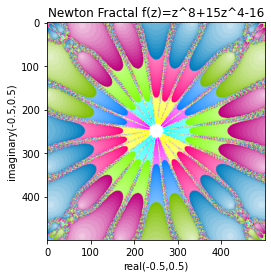

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


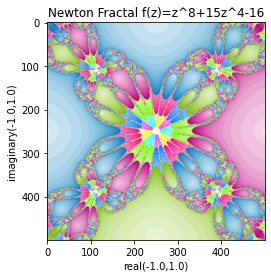

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


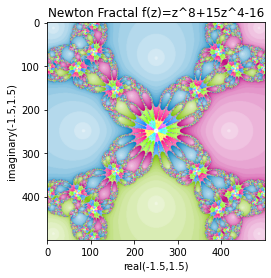

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


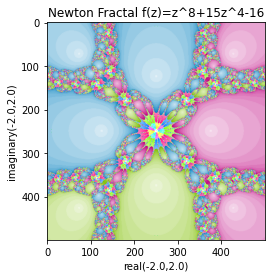

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


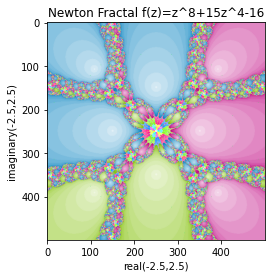

In [ ]:
display1(n=2,zoom=1,z_c_r=0, z_c_i=0)
display1(n=2,zoom=2,z_c_r=0, z_c_i=0)
display1(n=2,zoom=3,z_c_r=0, z_c_i=0)
display1(n=2,zoom=4,z_c_r=0, z_c_i=0)
display1(n=2,zoom=5,z_c_r=0, z_c_i=0)

# Plot z^3-1

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


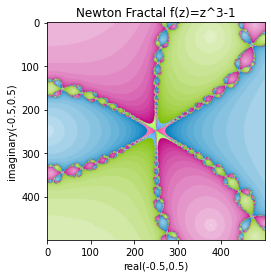

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


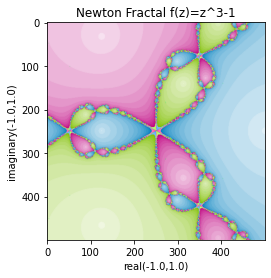

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


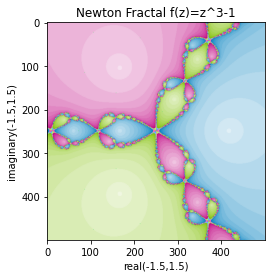

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


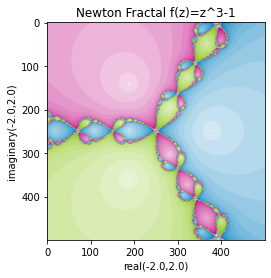

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


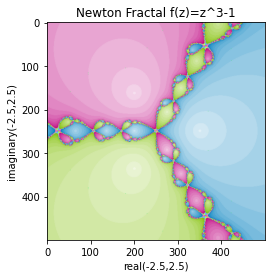

In [ ]:
display1(n=3,zoom=1,z_c_r=0, z_c_i=0)
display1(n=3,zoom=2,z_c_r=0, z_c_i=0)
display1(n=3,zoom=3,z_c_r=0, z_c_i=0)
display1(n=3,zoom=4,z_c_r=0, z_c_i=0)
display1(n=3,zoom=5,z_c_r=0, z_c_i=0)